**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Dataset**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

**Product Purchased:**	KP281, KP481, or KP781

**Age:**	In years

**Gender:**	Male/Female

**Education:**	In years

**MaritalStatus:**	Single or partnered

**Usage:**	The average number of times the customer plans to use the treadmill each week.
Income:	Annual income (in $)

**Fitness:**	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

**Miles:**	The average number of miles the customer expects to walk/run each week

**IMPORTING DATASET AND RELEVANT LIBRARIES**

In [ ]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as norm
import seaborn as sns

In [ ]:
# reading the Dataset
df=pd.read_csv("aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**SHAPE OF THE DATA**

In [ ]:
# Analysing the Shape of our Dataset
print(df.shape)
print(df.columns)

(180, 9)
Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


The Dataset Contains 180 Rows and 9 Columns.
The Columns of the dataset are as follows:
Product, Age, Gender, Education, MaritalStatus, Usage, Fitness, Income and Miles.

**DATA TYPE OF ATTRIBUTES**

In [ ]:
#Understanding the Data Types of the Attributes
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

The Data Types of the Attributes in the given Dataframe are integers(int64) except for Product, Gender and MaritalStatus which are objects.

In [ ]:
#Converting the required attributes to categorical one:
for col in ['Product','Gender','MaritalStatus']:
  df[col]=df[col].astype('category')
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

Apart from Product,Gender,MaritalStatus columns being categorical, the Fitness column, despite of it being a categorical, ordinal data, was kept as numerical for preliminary analysis.

**MISSING VALUE DETECTION**

In [ ]:
#Checking for null values for each attributes
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There is no null or empty values present in our dataset.

**STATISTICAL SUMMARY OF DATA**

In [ ]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Each Column have been Statistically summarized in terms of number of occurences, number of unique values, most occuring element and its frequency, etc. The most occuring categorical value in Product is KP281 with 80 occurences, for Gender it is Male with 104 occurences, for MaritalStatus it is Partnered with 107 occurences and for Fitness, people mostly rate their fitness 3 out of 5, with 97 occurences. The average Age of customers is 28.7, average income is $ 53719.57, and average miles customers expect to cover in threadmill is 103.19 miles.

**Non-Graphical Analysis**

In [ ]:
# Undertaking basic Non-Graphical Analysis
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

The most occuring categorical value in Product is KP281 with 80 occurences. Since this dataset has data of treadmills sold prior 3 months, KP281 model was sold the most in this time period. 3 types of treadmill models were sold.

In [ ]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

Most of the customers buying the treadmills tend to be Male.

In [ ]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

Most of the customers buying the treadmills tend to be Married.

In [ ]:
print("Mean of customer's Fitness rating:",round(df['Fitness'].mean(),2))
print("Mode of customer's Fitness rating:",df['Fitness'].mode()[0])

Mean of customer's Fitness rating: 3.31
Mode of customer's Fitness rating: 3


Mean of the Fitness rating given by customers is 3.31 and Most of the customers opted for 3 rating to indicate their Fitness.

**VISUAL ANALYSIS**

First, we attempt to understand the Type of Treadmills sold in the given dataset.

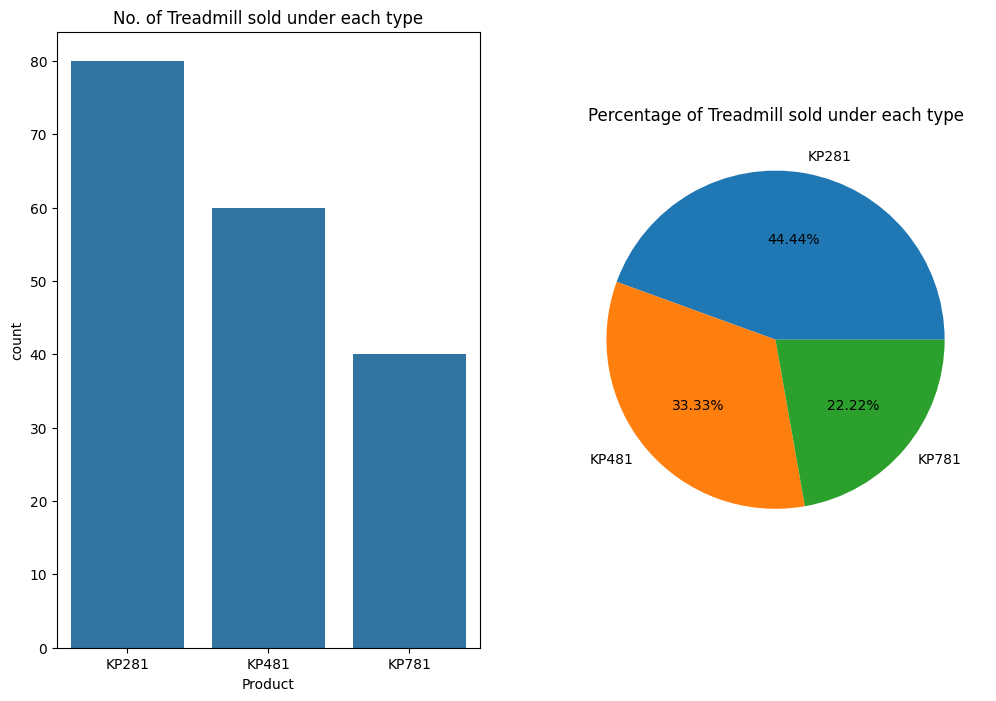

In [ ]:
#Understanding the Product types sold with countplot and pie chart
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Product')
plt.title("No. of Treadmill sold under each type")
plt.subplot(1,2,2)
plt.pie(x=df['Product'].value_counts(),labels=df['Product'].unique(),autopct="%0.2f%%")
plt.title("Percentage of Treadmill sold under each type")
plt.show()

KP281 was the most sold product in the dataset, which is 44.44% of the total products sold. KP481 is the second most sold product with 33.33% of the total products sold. The least sold product is KP781, with 22.22% of the total products sold.

Now, lets understand the characteristics of the customers with respect to the product purchased.

<Axes: xlabel='Age', ylabel='Density'>

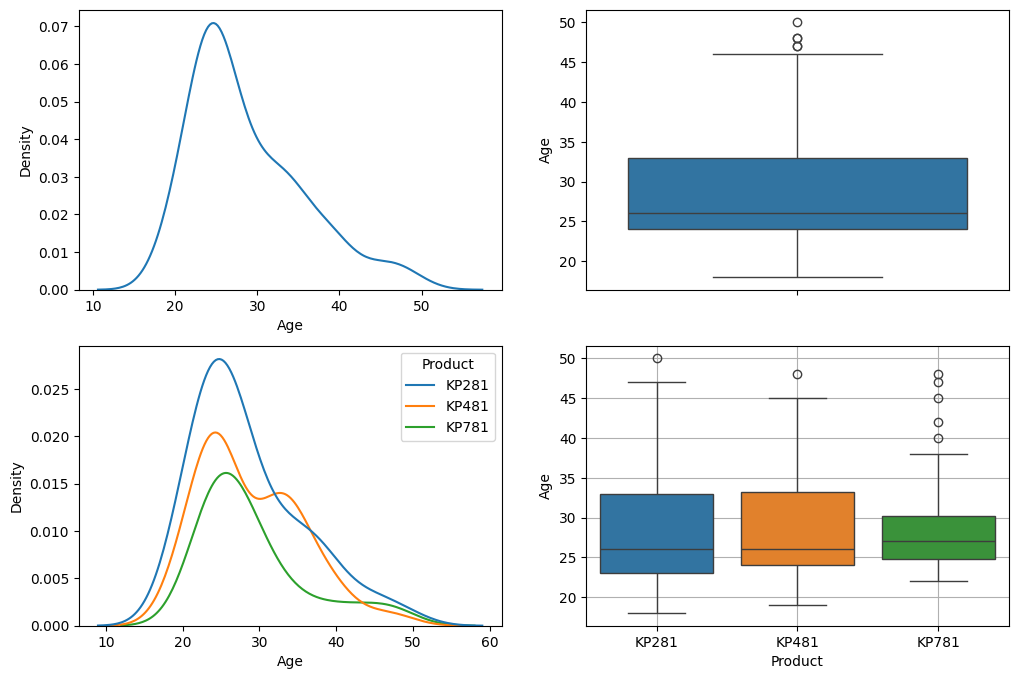

In [ ]:
#Attempting to understand the distribution of age within the customers.
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.kdeplot(df['Age'])
plt.subplot(2,2,2)
sns.boxplot(data=df,y='Age')
plt.subplot(2,2,4)
sns.boxplot(data=df,y='Age',x='Product',hue='Product')
plt.grid()
plt.subplot(2,2,3)
sns.kdeplot(data=df,x='Age',hue='Product')

From the charts, we can infer most of the customers buying the treadmills are between 20 to 35 years old.
However, when we looked upon the products purchased by customers with respect to different age groups, we can notice that median age is slightly higher for the product KP781 and have lesser range of customer age groups compared to KP281 and KP481.

<Axes: xlabel='Product', ylabel='Income'>

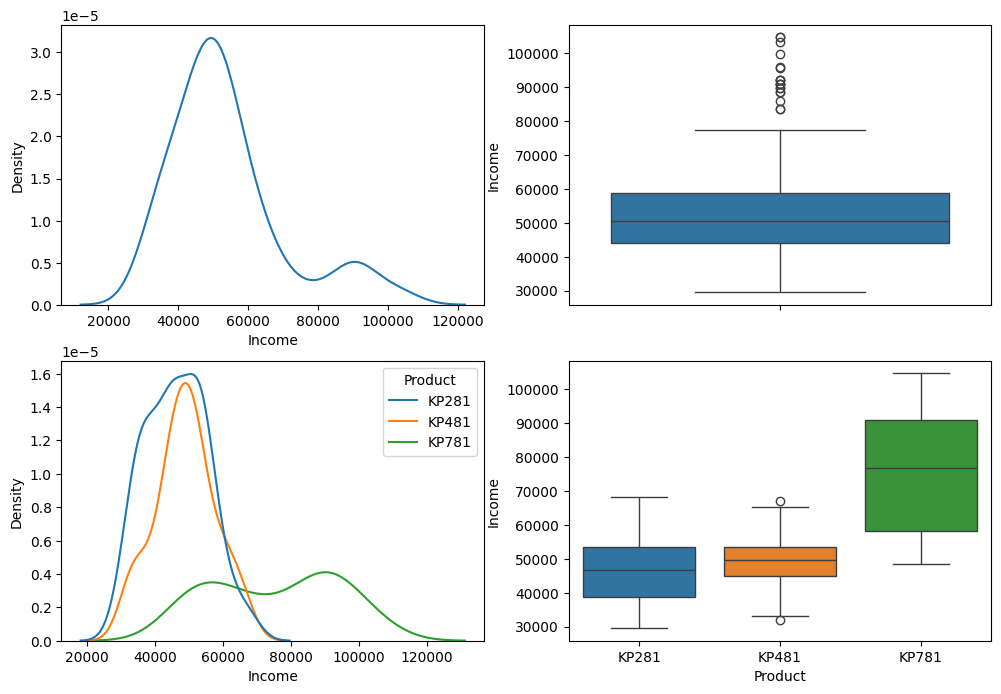

In [ ]:
#Attempting to understand Income distribution of customers
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.kdeplot(df['Income'])
plt.subplot(2,2,2)
sns.boxplot(df['Income'])
plt.subplot(2,2,3)
sns.kdeplot(data=df,x='Income',hue='Product')
plt.subplot(2,2,4)
sns.boxplot(data=df,x='Product',y='Income',hue='Product')

Although being the least bought product, Since KP781 being expensive out of all other products, it is noticable that customers purchasing this treadmill have relatively higher income than compared to the income of customers buying other products.

<Axes: xlabel='Product', ylabel='Fitness'>

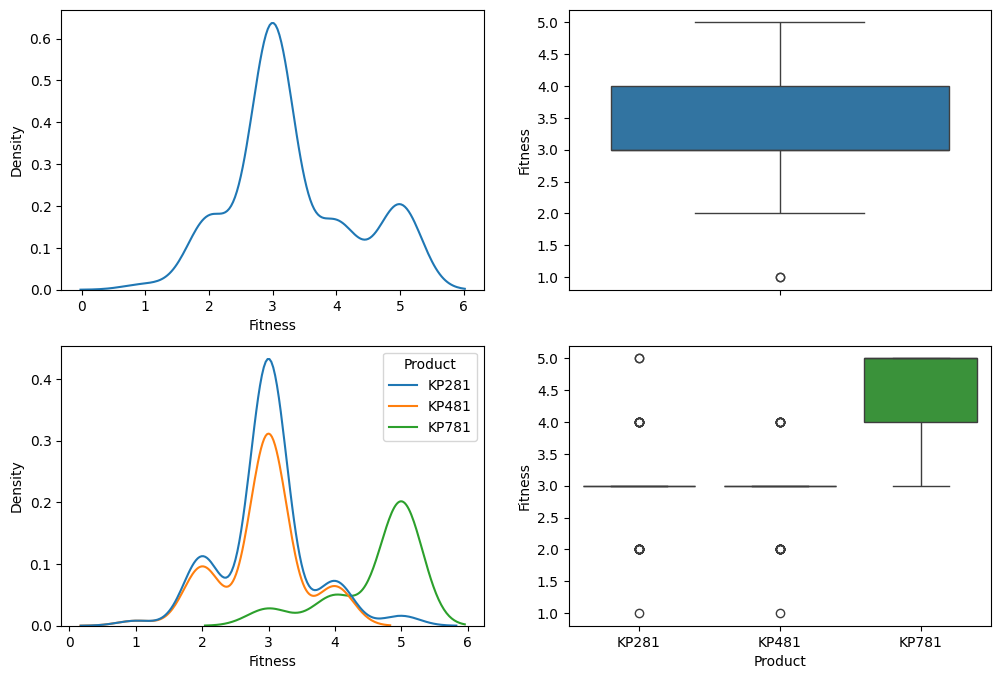

In [ ]:
#Attempting to understand Fitness of customers
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.kdeplot(df['Fitness'])
plt.subplot(2,2,2)
sns.boxplot(df['Fitness'])
plt.subplot(2,2,3)
sns.kdeplot(data=df,x='Fitness',hue='Product')
plt.subplot(2,2,4)
sns.boxplot(data=df,x='Product',y='Fitness',hue='Product')

The customers buying KP781 treadmill also seem to be way fit and in excellent
shape than of other customers as the median value of fitness itself is near 5 (excellent shape) for customers who bought KP781. Customers buying other products seem to rate themself mostly as 3 (moderate shape).

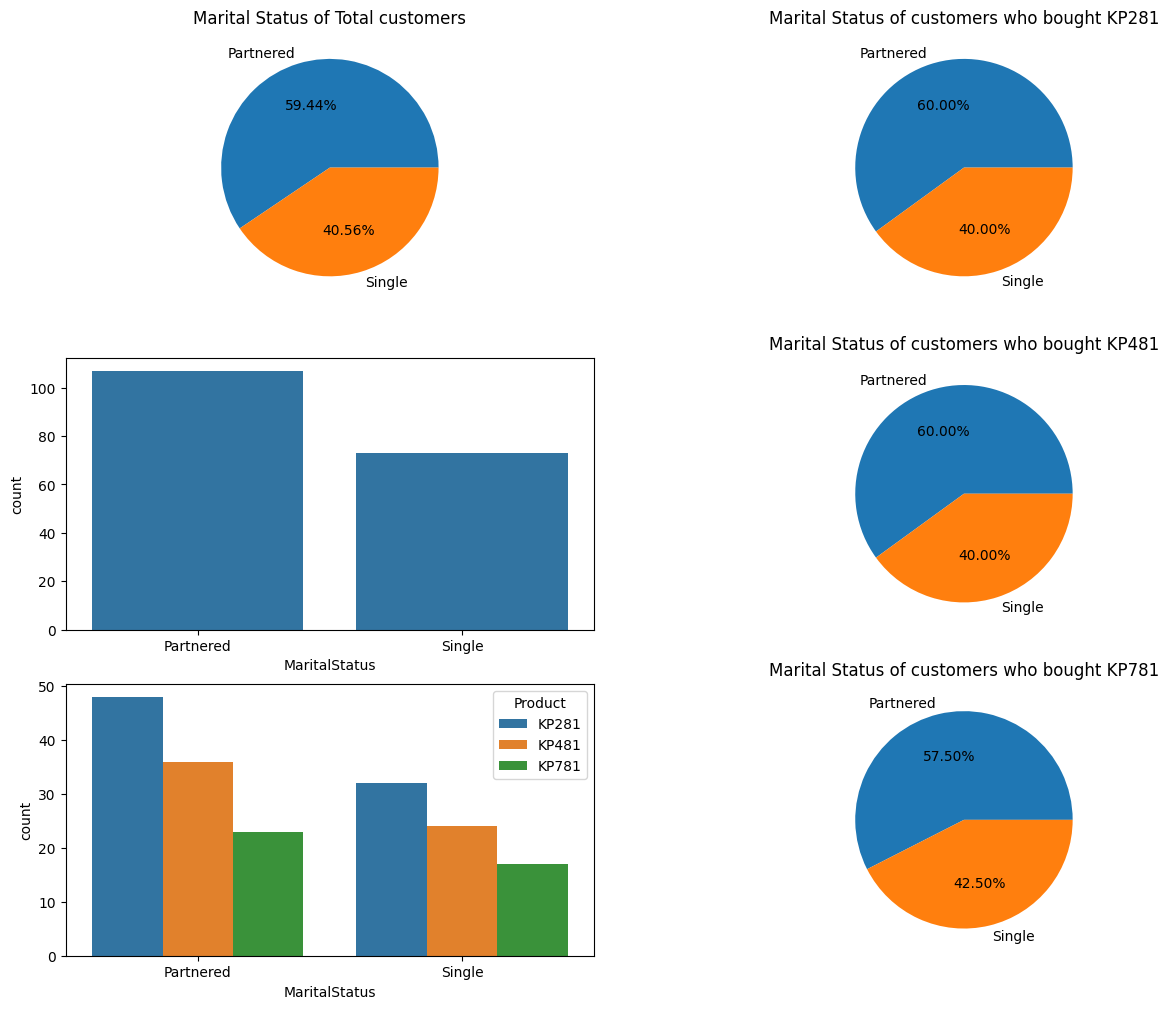

In [ ]:
#Attempting to understand MaritalStatus of customers
plt.figure(figsize=(15,12))
plt.subplot(3,2,3)
sns.countplot(data=df,x='MaritalStatus')
plt.subplot(3,2,1)
df_mar=df.groupby(['MaritalStatus'])['Product'].agg('count')
plt.pie(x=df_mar,labels=df_mar.index,autopct="%0.2f%%")
plt.title("Marital Status of Total customers")
plt.subplot(3,2,5)
sns.countplot(data=df,x='MaritalStatus',hue='Product')
plt.subplot(3,2,2)
df_marp1= df[df['Product']=="KP281"].groupby('MaritalStatus')['Product'].count()
plt.pie(x=df_marp1,labels=df_marp1.index,autopct="%0.2f%%")
plt.title("Marital Status of customers who bought KP281")
plt.subplot(3,2,4)
df_marp2= df[df['Product']=="KP481"].groupby('MaritalStatus')['Product'].count()
plt.pie(x=df_marp2,labels=df_marp2.index,autopct="%0.2f%%")
plt.title("Marital Status of customers who bought KP481")
plt.subplot(3,2,6)
df_marp3= df[df['Product']=="KP781"].groupby('MaritalStatus')['Product'].count()
plt.pie(x=df_marp3,labels=df_marp3.index,autopct="%0.2f%%")
plt.title("Marital Status of customers who bought KP781")
plt.show()

The Marital Status doent seeming have much influence in the Products purchased, as the dataset contains 60% partnered customers and 40% single customers, and proportion of customers remains nearly the same for all products as well.

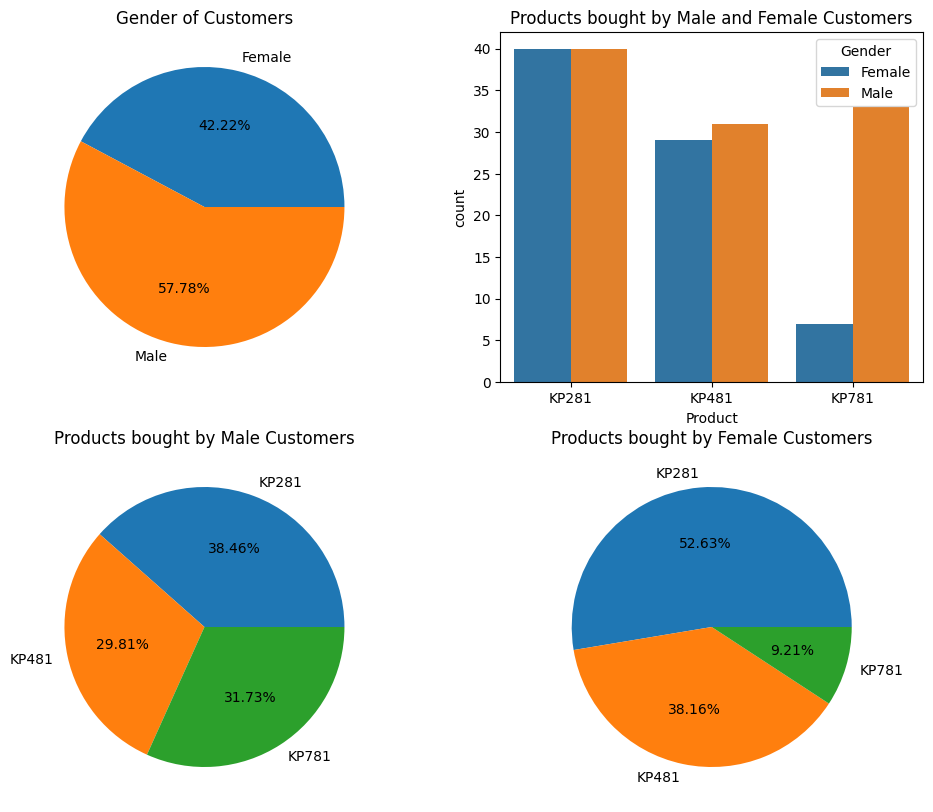

In [ ]:
#Attempting to understand Gender of customers
df_g=df.groupby("Gender")['Gender'].count()
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.pie(x=df_g,labels=df_g.index,autopct="%0.2f%%")
plt.title("Gender of Customers")
plt.subplot(2,2,2)
sns.countplot(data=df,x='Product',hue='Gender')
plt.title("Products bought by Male and Female Customers")
plt.subplot(2,2,3)
df_gm=df[df['Gender']=="Male"].groupby('Product')['Product'].count()
plt.pie(x=df_gm,labels=df_gm.index,autopct="%0.2f%%")
plt.title("Products bought by Male Customers")
plt.subplot(2,2,4)
df_gf=df[df['Gender']=="Female"].groupby('Product')['Product'].count()
plt.pie(x=df_gf,labels=df_gf.index,autopct="%0.2f%%")
plt.title("Products bought by Female Customers")
plt.show()

KP781 treadmill is purchased by way more Male customers than female customers. Female customers mostly buy the KP281 model and barely buy the KP781 model. Male customers tend to buy all the products.

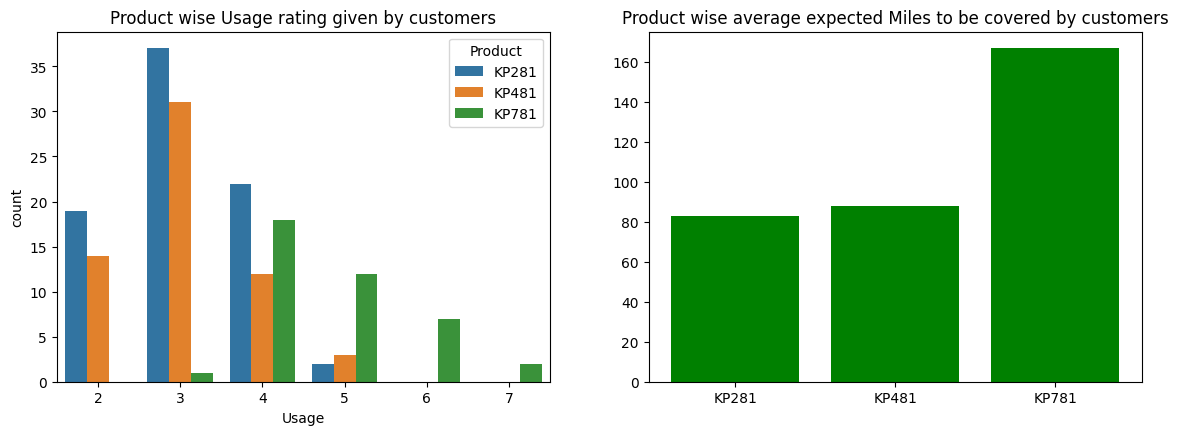

In [ ]:
#Attempting to understand Usage rating and average expected Miles to be covered by customers
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(data=df,x='Usage',hue='Product')
plt.title("Product wise Usage rating given by customers")
plt.subplot(2,2,2)
df_mile=df.groupby('Product')['Miles'].mean()
plt.bar(df_mile.index,df_mile,color='g')
plt.title("Product wise average expected Miles to be covered by customers")
plt.show()

Customers who bought KP781 product tend to use the product way often than other customers and cover more miles in the treadmill on an average.

<Axes: xlabel='Income', ylabel='Miles'>

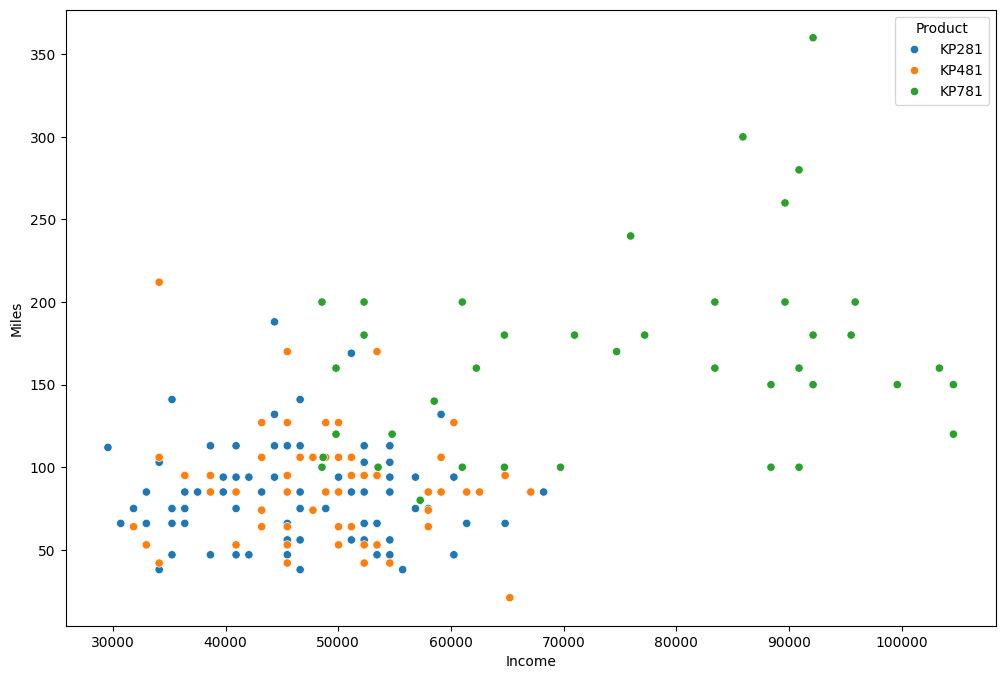

In [ ]:
#Attempting to understand the relationship between Income of customers and the amount of miles expected to cover in treadmill by the customers.
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Income',y='Miles',hue='Product')

As the income of the person increases, he/she expects to cover more miles in the treadmill, especially the customers who had bought the KP781 Product. This could also be because of the people who buy this product could be professional athletes or sportsmen.

<Axes: >

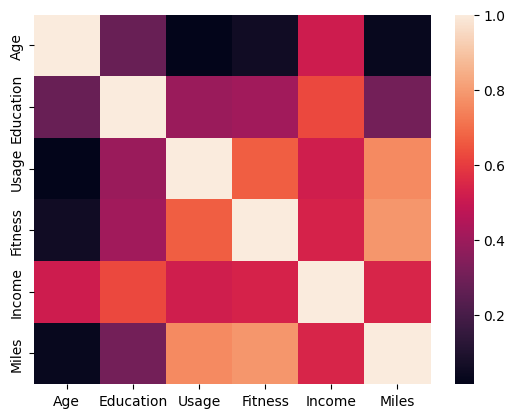

In [ ]:
#Attempting to Understand the correlation between the numeric values of the dataset.
df_num=df[['Age','Education','Usage','Fitness','Income','Miles']]
c=df_num.corr()
sns.heatmap(c)

Apart from Usage, Fitness and Miles having very high positive correlation between each other, Income also tend to have relatively higher positive correlation between Education, Usage, Age, Fitness and Miles. So people with higher income tend to have more Education, Age, have fitness and usage of treadmill, and capable of running more miles.

**Probability**

  Product  Gender  Total  Prob
0   KP281      40    104  0.38
1   KP481      31    104  0.30
2   KP781      33    104  0.32


Text(0.5, 1.0, 'Probability of Male selecting the Products')

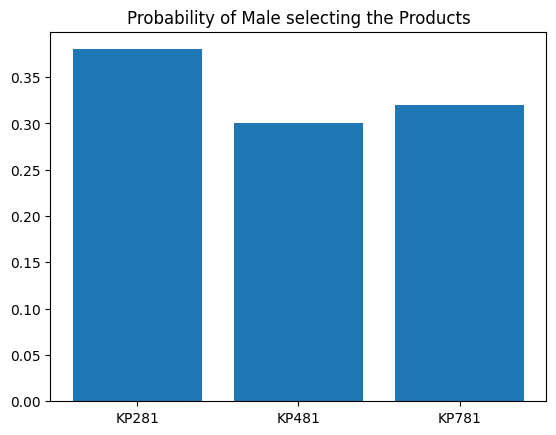

In [ ]:
#Probability of Males buying the Products
dpm=df[df['Gender']=="Male"].groupby('Product')['Gender'].count().reset_index()
dpm['Total']= df[df['Gender']=="Male"]['Gender'].count()
dpm['Prob']=round(dpm['Gender']/dpm['Total'],2)
print(dpm)
plt.bar(dpm['Product'],dpm['Prob'])
plt.title("Probability of Male selecting the Products")

Given the customer is male, it is slightly more likely that he may prefer KP281 and slightly less likely he may select KP481.

  Product  Gender  Total  Prob
0   KP281      40     76  0.53
1   KP481      29     76  0.38
2   KP781       7     76  0.09


Text(0.5, 1.0, 'Probability of Female selecting the Products')

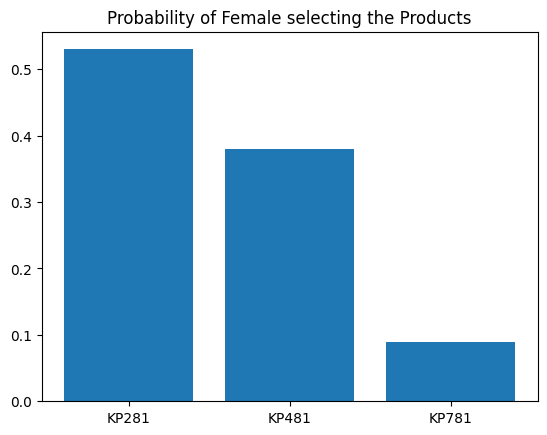

In [ ]:
#Probability of Females buying the Products
dpf=df[df['Gender']=="Female"].groupby('Product')['Gender'].count().reset_index()
dpf['Total']= df[df['Gender']=="Female"]['Gender'].count()
dpf['Prob']=round(dpf['Gender']/dpf['Total'],2)
print(dpf)
plt.bar(dpf['Product'],dpf['Prob'])
plt.title("Probability of Female selecting the Products")

Given the customer is female, it is very much less likely for her to buy KP781 and more likely to buy KP281 followed by KP481

In [ ]:
#Attempting to Understand the proportion of customers based on fitness levels, w.r.t Products
cb=pd.crosstab(df.Product,df.Fitness,normalize='index')
print(cb)


Fitness         1      2      3         4      5
Product                                         
KP281    0.012500  0.175  0.675  0.112500  0.025
KP481    0.016667  0.200  0.650  0.133333  0.000
KP781    0.000000  0.000  0.100  0.175000  0.725


KP781 product is more likely to be bought by Males and Females with fitness more than 3 rating, which is 90% of the time.

In [ ]:
#Attempting to Understand the proportion of customers based on fitness levels and genders, w.r.t Products
ca=pd.crosstab([df.Product],[df.Gender, df.Fitness],normalize='index')
ca

Gender     Female                                    Male               \
Fitness         1      2      3         4       5       1     2      3   
Product                                                                  
KP281    0.000000  0.125  0.325  0.037500  0.0125  0.0125  0.05  0.350   
KP481    0.016667  0.100  0.300  0.066667  0.0000  0.0000  0.10  0.350   
KP781    0.000000  0.000  0.025  0.025000  0.1250  0.0000  0.00  0.075   

Gender                     
Fitness         4       5  
Product                    
KP281    0.075000  0.0125  
KP481    0.066667  0.0000  
KP781    0.150000  0.6000

KP781 product is more likely to be bought by Males with fitness more than 3 rating, which is 75% of the time and Females with fitness more than 3 rating which is 15% of the time.

In [ ]:
#Attempting to Understand the proportion of genders and marital status,w.r.t Product
dfm = df[df['Gender']=="Male"]
cc=pd.crosstab(dfm.Product,[dfm.MaritalStatus],normalize='index')
print(cc)
dff = df[df['Gender']=="Female"]
cd=pd.crosstab(dff.Product,[dff.MaritalStatus],normalize='index')
print(cd)

MaritalStatus  Partnered    Single
Product                           
KP281           0.525000  0.475000
KP481           0.677419  0.322581
KP781           0.575758  0.424242
MaritalStatus  Partnered    Single
Product                           
KP281           0.675000  0.325000
KP481           0.517241  0.482759
KP781           0.571429  0.428571


Most of the customers purchasing the treadmills seem to be married, even w.r.t products.

**Recommendations and Actionable Insights**

KP781 Treadmill Model, despite being expensive and least sold out of other Treadmills, seem to have predominantly a specific user base, Male customers with higher fitness rating, higher income, higher average miles expected to cover, higher usage rating, with nearly 50% of users are in age from 25 to 30.
Customers buying other products such as KP281, KP481 tend to have lesser fitness rating, lesser income, lesser average miles expected to cover, less usage rating compared to KP781 customers.

1. As the user base of KP781 Treadmill Model is established, Can undertake Advertisements in social media platforms with cotents which please these type of audience to buy this product.
2. Can add user specific features to the KP781 Treadmill based on the necessities of its custumers, like constantly tracking the usage of the treadmill and setting up user specific customizable goals for the user to accomplish, sending reminders to the users about their goal and their journey of fitness by integrating an Mobile Application.
3. Can include customization in the KP781 Treadmill. Since the users have comparitively higher income, product customization can be introduced to improve the treadmill functionally and aesthetically.
4. KP281 product is the most sold with customer base having average fitness, relatively lesser income and lesser usage rating. Advertising should focus on the products cost efficiency and budget friendly. The Product can focus on its necessary features of treadmill for entry level users without much luxury elements or add-ons. Being its users having average Fitness and Usage rating, the product can provide them with various guides to effective utilize the product in their fitness journey and maximize its usage.
5. KP481 product could also follow similar recommendations as KP281 product, as these products have customers with very similar characteristics.



